# Deep Learning RNN Model for Used Motorcycle Price Prediction
## IS794 AL - Deep Learning (Lab)
Kelompok B: <br>
- Daffa Kaisha Pratama Chandra (00000055770)
- Justine Donovan (00000063202)
- Marsella Patricia (00000063226)
- Reina Ratu Balqis (00000065099)
---
### Import Libraries

In [1]:
# Basic library
import pandas as pd
import numpy as np
from scipy import stats

# Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Deep learning
import tensorflow as tf
from tensorflow import keras

# Ignore warning
import warnings
warnings.simplefilter("ignore")

---
Baca Dataset

In [2]:
yamaha = pd.read_csv("motor_yamaha_bekas.csv", engine='pyarrow')
honda = pd.read_csv("motor_honda_bekas.csv", engine='pyarrow')
kawasaki = pd.read_csv("motor_kawasaki_bekas.csv", engine='pyarrow')
suzuki = pd.read_csv("motor_suzuki_bekas.csv", engine='pyarrow')

Penjelasan singkat mengenai dataset yang digunakan: <br>
Dataset ini merupakan hasil web scraping dari website https://momotor.id/

In [3]:
print("Shape dari tiap dataset:")
print(f"Dataset Yamaha memiliki {yamaha.shape[1]} kolom dan {yamaha.shape[0]} baris.")
print(f"Dataset Honda memiliki {honda.shape[1]} kolom dan {honda.shape[0]} baris.")
print(f"Dataset Kawasaki memiliki {kawasaki.shape[1]} kolom dan {kawasaki.shape[0]} baris.")
print(f"Dataset Suzuki memiliki {suzuki.shape[1]} kolom dan {suzuki.shape[0]} baris.")

Shape dari tiap dataset:
Dataset Yamaha memiliki 10 kolom dan 493 baris.
Dataset Honda memiliki 10 kolom dan 966 baris.
Dataset Kawasaki memiliki 10 kolom dan 96 baris.
Dataset Suzuki memiliki 10 kolom dan 23 baris.


In [4]:
print("Informasi singkat dari tiap dataset:\n")
print("Yamaha:")
print(yamaha.info())
print("\nHonda:")
print(honda.info())
print("\nKawasaki:")
print(kawasaki.info())
print("\nSuzuki:")
print(suzuki.info())

Informasi singkat dari tiap dataset:

Yamaha:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nama_motor       352 non-null    object 
 1   lokasi           352 non-null    object 
 2   harga            352 non-null    object 
 3   deskripsi        352 non-null    object 
 4   kapasitas_mesin  352 non-null    object 
 5   tahun            352 non-null    float64
 6   transmisi        352 non-null    object 
 7   kilometer        352 non-null    object 
 8   url              493 non-null    object 
 9   merk             493 non-null    object 
dtypes: float64(1), object(9)
memory usage: 38.6+ KB
None

Honda:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nama_motor       629 non-null

Pre-process I: Data mentah -> Data siap pakai
Akan dilakukan cek <i> missing values. </i> Jika terdapat <i> missing values, </i> data yang hilang akan diimputasi menggunakan nilai modus. 

In [5]:
# Cek rata-rata missing values pada tiap dataset
brand = ['yamaha', 'honda', 'kawasaki', 'suzuki']
data = [yamaha, honda, kawasaki, suzuki]

for i, j in zip(brand, data):
    print(f"{i} missing values: \n{np.round(honda.isnull().mean(), 2)*100}")
    print()

yamaha missing values: 
nama_motor         35.0
lokasi             35.0
harga              35.0
deskripsi          35.0
kapasitas_mesin    35.0
tahun              35.0
transmisi          35.0
kilometer          35.0
url                 0.0
merk                0.0
dtype: float64

honda missing values: 
nama_motor         35.0
lokasi             35.0
harga              35.0
deskripsi          35.0
kapasitas_mesin    35.0
tahun              35.0
transmisi          35.0
kilometer          35.0
url                 0.0
merk                0.0
dtype: float64

kawasaki missing values: 
nama_motor         35.0
lokasi             35.0
harga              35.0
deskripsi          35.0
kapasitas_mesin    35.0
tahun              35.0
transmisi          35.0
kilometer          35.0
url                 0.0
merk                0.0
dtype: float64

suzuki missing values: 
nama_motor         35.0
lokasi             35.0
harga              35.0
deskripsi          35.0
kapasitas_mesin    35.0
tahun          

In [6]:
# cari modus dari tiap kolom yang terdapat missing values
kolom_null = ['nama_motor', 'lokasi', 'harga', 'deskripsi', 
              'kapasitas_mesin', 'tahun', 'transmisi', 'kilometer']

In [7]:
# Cari modus dan replace NaN dengan modus
for col in kolom_null:
    # Yamaha
    modus_yamaha = yamaha[col].value_counts().nlargest(3)
    # Honda
    modus_honda = yamaha[col].value_counts().nlargest(3)
    # Kawasaki
    modus_kawasaki = yamaha[col].value_counts().nlargest(3)
    # Suzuki
    modus_suzuki = yamaha[col].value_counts().nlargest(3)
    
    # Check if the mode values exist
    if len(modus_yamaha) >= 2:
        # Extract the mode strings
        modus_ymh1 = modus_yamaha.index[0]
        modus_ymh2 = modus_yamaha.index[1]

        # Define a list of possible string values between the modes
        possible_values_ymh = [modus_ymh1, modus_ymh2]

        # Replace NaN dengan nilai random antara modus pertama/kedua/ketiga
        yamaha[col] = yamaha[col].apply(lambda x: np.random.choice(possible_values_ymh) if pd.isna(x) else x)

    if len(modus_honda) >= 2:
        # Extract the mode strings
        modus_hnd1 = modus_honda.index[0]
        modus_hnd2 = modus_honda.index[1]

        # Define a list of possible string values between the modes
        possible_values_hnd = [modus_hnd1, modus_hnd2]

        # Replace NaN dengan nilai random antara modus pertama/kedua/ketiga
        honda[col] = honda[col].apply(lambda x: np.random.choice(possible_values_hnd) if pd.isna(x) else x)

    if len(modus_kawasaki) >= 2:
        # Extract the mode strings
        modus_kws1 = modus_kawasaki.index[0]
        modus_kws2 = modus_kawasaki.index[1]

        # Define a list of possible string values between the modes
        possible_values_kws = [modus_kws1, modus_kws2]

        # Replace NaN dengan nilai random antara modus pertama/kedua/ketiga
        kawasaki[col] = kawasaki[col].apply(lambda x: np.random.choice(possible_values_kws) if pd.isna(x) else x)

    if len(modus_suzuki) >= 2:
        # Extract the mode strings
        modus_szk1 = modus_suzuki.index[0]
        modus_szk2 = modus_suzuki.index[1]

        # Define a list of possible string values between the modes
        possible_values_szk = [modus_szk1, modus_szk2]

        # Replace NaN dengan nilai random antara modus pertama/kedua/ketiga
        suzuki[col] = suzuki[col].apply(lambda x: np.random.choice(possible_values_szk) if pd.isna(x) else x)

In [8]:
# Cek missing values lagi
for i, j in zip(brand, data):
    print(f"{i} missing values: \n{np.round(j.isnull().mean(), 2)*100}")
    print()

yamaha missing values: 
nama_motor         0.0
lokasi             0.0
harga              0.0
deskripsi          0.0
kapasitas_mesin    0.0
tahun              0.0
transmisi          0.0
kilometer          0.0
url                0.0
merk               0.0
dtype: float64

honda missing values: 
nama_motor         0.0
lokasi             0.0
harga              0.0
deskripsi          0.0
kapasitas_mesin    0.0
tahun              0.0
transmisi          0.0
kilometer          0.0
url                0.0
merk               0.0
dtype: float64

kawasaki missing values: 
nama_motor         0.0
lokasi             0.0
harga              0.0
deskripsi          0.0
kapasitas_mesin    0.0
tahun              0.0
transmisi          0.0
kilometer          0.0
url                0.0
merk               0.0
dtype: float64

suzuki missing values: 
nama_motor         0.0
lokasi             0.0
harga              0.0
deskripsi          0.0
kapasitas_mesin    0.0
tahun              0.0
transmisi          0.0
kilo

In [9]:
# Merge dataset
used_motor = pd.concat([yamaha, honda, kawasaki, suzuki])
print("Shape dari dataset yang digabung: ", used_motor.shape)
used_motor.head()

Shape dari dataset yang digabung:  (1578, 10)


,nama_motor,lokasi,harga,deskripsi,kapasitas_mesin,tahun,transmisi,kilometer,url,merk
0,Yamaha Aerox 155 Vva,Kota Jakarta Barat,"Rp24,500,000",Motor mulus dan bagus untuk surat-surat lengka...,155 CC,2018.0,Otomatis,>30000 KM,https://www.momotor.id/motor-bekas/yamaha/yama...,Yamaha
1,Yamaha Nmax Abs,Kota Jakarta Barat,"Rp24,500,000",Motor mulus dan bagus untuk surat-surat lengka...,125 CC,2018.0,Otomatis,>30000 KM,https://www.momotor.id/motor-bekas/yamaha/yama...,Yamaha
2,Yamaha Nmax Abs,Kab. Tangerang,"Rp23,500,000",Motor mulus dan bagus untuk surat-surat lengka...,155 CC,2018.0,Otomatis,10000 - 20000KM,https://www.momotor.id/motor-bekas/yamaha/yama...,Yamaha
3,Yamaha Nmax Abs,Kota Jakarta Barat,"Rp23,500,000",Motor mulus dan bagus untuk surat-surat lengka...,125 CC,2019.0,Manual,10000 - 20000KM,https://www.momotor.id/motor-bekas/yamaha/yama...,Yamaha
4,Yamaha Aerox 155 Vva,Kab. Tangerang,"Rp23,500,000",Motor mulus dan bagus untuk surat-surat lengka...,125 CC,2018.0,Otomatis,10000 - 20000KM,https://www.momotor.id/motor-bekas/yamaha/yama...,Yamaha


---
#### Exploratory Data Analysis <br>
Pada tahap EDA, akan dilakukan ....

In [10]:
used_motor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1578 entries, 0 to 22
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nama_motor       1578 non-null   object 
 1   lokasi           1578 non-null   object 
 2   harga            1578 non-null   object 
 3   deskripsi        1578 non-null   object 
 4   kapasitas_mesin  1578 non-null   object 
 5   tahun            1578 non-null   float64
 6   transmisi        1578 non-null   object 
 7   kilometer        1578 non-null   object 
 8   url              1578 non-null   object 
 9   merk             1578 non-null   object 
dtypes: float64(1), object(9)
memory usage: 135.6+ KB


In [11]:
# Loop melalui tiap kolom dan mencetak nilai unik
unique_value_count ={}
for column in used_motor.columns : 
    unique_values = used_motor[column].unique()
    unique_count = len(unique_values)
    unique_value_count[column] = unique_count

for column, count in unique_value_count.items():
    print(f"{column} : {count}")


nama_motor : 154
lokasi : 16
harga : 261
deskripsi : 412
kapasitas_mesin : 31
tahun : 8
transmisi : 2
kilometer : 5
url : 1578
merk : 4


---
#### Data Pre-processing
Pada tahap ini, akan dilakukan:
- <i>remove missing values</i>
- 

##### Drop variabel yang tidak dibutuhkan

In [12]:
used_motor = used_motor.drop(columns=['deskripsi', 'url'])
used_motor.head()

,nama_motor,lokasi,harga,kapasitas_mesin,tahun,transmisi,kilometer,merk
0,Yamaha Aerox 155 Vva,Kota Jakarta Barat,"Rp24,500,000",155 CC,2018.0,Otomatis,>30000 KM,Yamaha
1,Yamaha Nmax Abs,Kota Jakarta Barat,"Rp24,500,000",125 CC,2018.0,Otomatis,>30000 KM,Yamaha
2,Yamaha Nmax Abs,Kab. Tangerang,"Rp23,500,000",155 CC,2018.0,Otomatis,10000 - 20000KM,Yamaha
3,Yamaha Nmax Abs,Kota Jakarta Barat,"Rp23,500,000",125 CC,2019.0,Manual,10000 - 20000KM,Yamaha
4,Yamaha Aerox 155 Vva,Kab. Tangerang,"Rp23,500,000",125 CC,2018.0,Otomatis,10000 - 20000KM,Yamaha


In [13]:
# Lihat nilai unik dari setiap kolom
kolom = used_motor.columns

for i in kolom:
    print(f"Nilai unik dari kolom {i}:")
    print(used_motor[i].unique())

Nilai unik dari kolom nama_motor:
['Yamaha Aerox 155 Vva' 'Yamaha Nmax Abs' 'Yamaha Lexi S'
 'Yamaha Jupiter Mx Cw' 'Yamaha All New Nmax 155' 'Yamaha Fino Sporty'
 'Yamaha Gear 125' 'Yamaha Gear 125 S-version' 'Yamaha All New Xsr 155'
 'Yamaha R15 Gp Tech 3' 'Yamaha Scorpio G' 'Yamaha Vixion Extreme'
 'Yamaha R15 Gp Movistar' 'Yamaha R15' 'Yamaha All New R15 155 Vva'
 'Yamaha Mio Z 125' 'Yamaha WR 155 R' 'Yamaha Mio Cw'
 'Yamaha All New Nmax 155 Abs' 'Yamaha Freego' 'Yamaha Aerox 155 Vva-s'
 'Yamaha Lexi' 'Yamaha New Mio M3 Cw' 'Yamaha N Max' 'Yamaha Mio'
 'Yamaha New Vixion' 'Yamaha XMAX' 'Yamaha All New X-ride 125'
 'Yamaha Nmax Special Custom' 'Yamaha Fazzio Neo'
 'Yamaha All New Nmax 155 Con' 'Yamaha X Ride Se' 'Yamaha Xmax Abs'
 'Yamaha Xmax' 'Yamaha X-ride' 'Yamaha Fino Sport 125 Blu Cr'
 'Yamaha Aerox 155 Vva R' 'Yamaha All New Vixion R'
 'Yamaha New V Ixion Adv Gp' 'Yamaha Mio M3 125' 'Yamaha New Aerox 155 C'
 'Yamaha Fino Grade 125' 'Yamaha R25' 'Yamaha Fino Premium Fi Se'
 'Y

Kolom kapasitas mesin dan harga belum dalam format yang benar

##### Membersihkan kolom harga

In [14]:
def clean_harga(harga):
    harga_clean = harga.replace("Rp", "").replace(".", "").replace(",", "")
    return harga_clean

used_motor['harga'] = used_motor['harga'].apply(clean_harga)
# used_motor['harga'] = pd.to_numeric(used_motor['harga'], errors='coerce', downcast='integer')
# used_motor['harga'] = pd.to_numeric(used_motor['harga'], errors='coerce')
used_motor['harga'] = used_motor['harga'].apply(float)

##### Membersihkan kolom kapasitas mesin

In [15]:
def clean_cc(kapasitas_mesin):
    cc_clean = kapasitas_mesin.replace("cc", "")
    cc_clean2 = cc_clean.replace(" CC", "")
    cc_clean3 = cc_clean2.replace("Cc", "")
    cc_clean4 = cc_clean3.replace("CC", "")
    cc_clean5 = cc_clean4.replace("p", "")
    return cc_clean5

used_motor['kapasitas_mesin'] = used_motor['kapasitas_mesin'].apply(clean_cc)
used_motor['kapasitas_mesin'] = used_motor['kapasitas_mesin'].replace(['-', ''], 150)
used_motor['kapasitas_mesin'] = used_motor['kapasitas_mesin'].replace('1550', 150)
used_motor = used_motor[used_motor['kapasitas_mesin'] != 'DSE4202201']
used_motor['kapasitas_mesin'] = used_motor['kapasitas_mesin'].astype('int')
print(used_motor['kapasitas_mesin'].unique())

[155 125 220 150 250 156 110 249 115 160  11 113 900 175 600]


In [16]:
used_motor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1577 entries, 0 to 22
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nama_motor       1577 non-null   object 
 1   lokasi           1577 non-null   object 
 2   harga            1577 non-null   float64
 3   kapasitas_mesin  1577 non-null   int32  
 4   tahun            1577 non-null   float64
 5   transmisi        1577 non-null   object 
 6   kilometer        1577 non-null   object 
 7   merk             1577 non-null   object 
dtypes: float64(2), int32(1), object(5)
memory usage: 104.7+ KB


##### Membuat kategori baru untuk kolom kilometer

In [17]:
used_motor['kilometer_kategori'] = used_motor['kilometer'].replace({'>30000 KM': 'Tinggi', 
                                                                    '5000 - 10000KM' and '10000 - 20000KM': 'Sedang',  
                                                                    '1000 - 5000 KM': 'Rendah'})

In [18]:
used_motor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1577 entries, 0 to 22
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nama_motor          1577 non-null   object 
 1   lokasi              1577 non-null   object 
 2   harga               1577 non-null   float64
 3   kapasitas_mesin     1577 non-null   int32  
 4   tahun               1577 non-null   float64
 5   transmisi           1577 non-null   object 
 6   kilometer           1577 non-null   object 
 7   merk                1577 non-null   object 
 8   kilometer_kategori  1577 non-null   object 
dtypes: float64(2), int32(1), object(6)
memory usage: 117.0+ KB


##### Encoding

In [19]:
# Initialize LabelEncoder
le = LabelEncoder()

# Select column wiht categorical values
cols = ['lokasi', 'transmisi', 'kilometer_kategori', 'merk']
for i in cols:
    used_motor[i] = le.fit_transform(used_motor[i]) + 1

# Check the data
used_motor.head()

,nama_motor,lokasi,harga,kapasitas_mesin,tahun,transmisi,kilometer,merk,kilometer_kategori
0,Yamaha Aerox 155 Vva,9,24500000.0,155,2018.0,2,>30000 KM,4,5
1,Yamaha Nmax Abs,9,24500000.0,125,2018.0,2,>30000 KM,4,5
2,Yamaha Nmax Abs,4,23500000.0,155,2018.0,2,10000 - 20000KM,4,4
3,Yamaha Nmax Abs,9,23500000.0,125,2019.0,1,10000 - 20000KM,4,4
4,Yamaha Aerox 155 Vva,4,23500000.0,125,2018.0,2,10000 - 20000KM,4,4


##### MinMax Scaler

##### Feature Selection

In [23]:
# Choosing X and y
X = used_motor.drop(columns=['harga', 'kilometer', 'nama_motor'] )
y = used_motor['harga']

# Initialize MinMaxScaler
mms = MinMaxScaler()
X_mms = mms.fit_transform(X)

In [24]:
# Train test split untuk feature importance
X_train, X_test, y_train, y_test = train_test_split(X_mms, y, test_size=0.2, random_state=1)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Random forest regressor untuk memilih feature importance
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


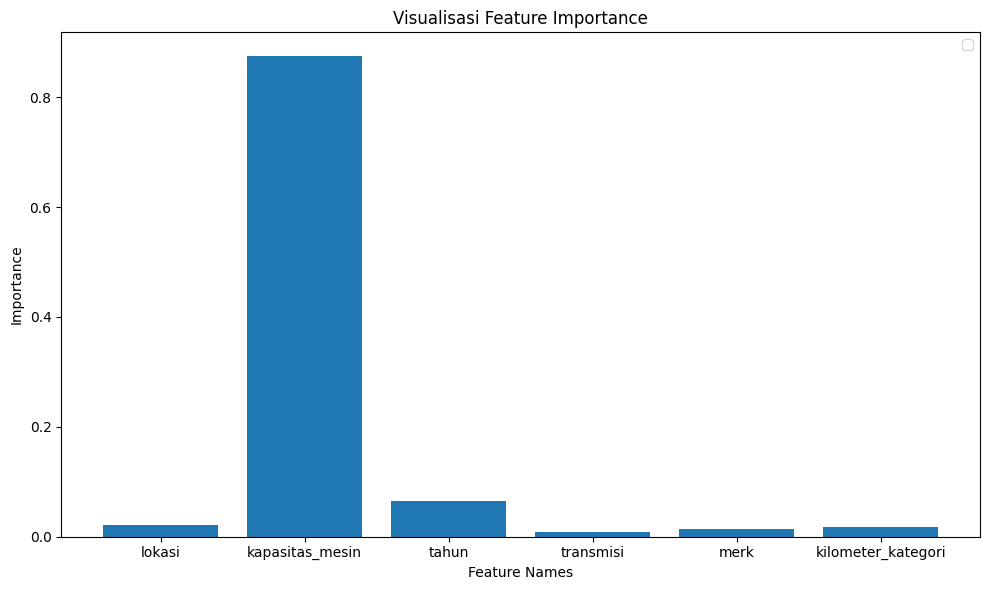

In [26]:
rf_fi = rf.feature_importances_

# Define Nama columns
feature_names = X.columns.tolist()

plt.figure(figsize=(10, 6))

# Plotting feature importances
plt.bar(feature_names, rf_fi)
plt.xlabel('Feature Names')
plt.ylabel('Importance')
plt.title('Visualisasi Feature Importance')
plt.legend()
plt.tight_layout()
plt.show()

##### confussion Matrix

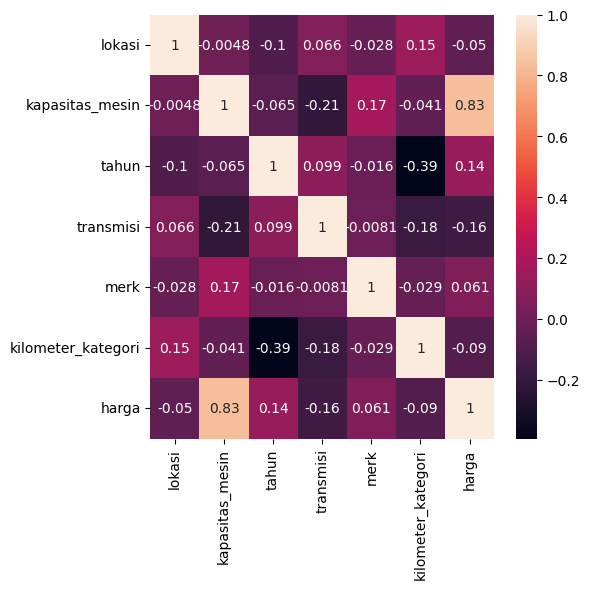

In [28]:
check = pd.concat([X,y], axis=1)
correlation = check.corr()

plt.figure(figsize=(6,6))
sns.heatmap(correlation, annot=True)
plt.tight_layout()
plt.show()

---
#### Modeling
Pada tahap ....

Tuning Hyperparameter <br>
....

Finalisasi Model
....

---
#### Evaluasi

Terlihat model .....

---
#### Save model
Model yang dengan akurasi tertinggi akan disimpan untuk di <i> deploy </i>